# Aula 5

# "Data Pipelines" - Parte 1

# Extração e Transformação dos dados

### Eduardo Lobo Lustosa Cabral

## 1. Objetivos

Apresentar o conceito de "data pipelines".

Apresentar ferramentas do TensorFlow para criar "data pipelines" eficientes.

Apresentar as etapas de extração e transformação de um "data pipeline". 

Apresentar exemplos das etapas de extração e transfromação de um "pipelines" para diferentes tipos de dados.

### Importa principais bibliotecas

In [1]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

np.set_printoptions(precision=4)

## 2. Data Pipelines

Com já vimos, existem muitos tipos de dados e problemas. Como por exemplo:

-	Imagens $\to$ classificação, detecção e localização de objetos, segmentação, geração de novas imagens.
-	Texto $\to$  classificação, análise de sentimento, geração de novos textos, tradução de texto, chatbot.
- Áudio $\to$  reconhecimento de voz, música, geração de áudio (música e voz).
- Vídeo $\to$  classificação, reconhecimento de ação, rastreamento de objetos, entendimento de vídeo.
- Séries temporais $\to$  previsão, regressão (ajuste de função).
- Dados estruturados $\to$ regressão, sistemas de recomendação, classificação. 

<br>
Para processar e carregar dados para treinar uma RNA de forma eficiente deve-se criar um "data pipeline". 

**Data pipelines** funcionam no princípio ETC (Extrair, Transformar e Carregar) que em inglês é ETL (Extraction, Tranformation and Load).

- **Extrair** $\to$ carrega dados originais do local onde se encontram e traz para o nosso ambiente de computação;
- **Transformar** $\to$ processa os dados para serem colocados em formatos adequados que podem ser usados por uma RNA;
- **Carregar** $\to$ alimenta a RNA com dados durante o seu treinamento ou para realizar previsões quando colocada em operação.


**Nessa aula veremos as etapas de Extração e Transformação de um Pipeline.**

<br>
Cada tipo de dado exige um "pipeline" diferente. Por exemplo:

- Imagens $\to$ ler arquivos, aplicar transformações em cada imagem e juntar aletoriamente em lotes para treinamento.
-	Texto $\to$ ler arquivos, pode envolver extrair palavras ou letras do texto, converter em vetores “one-hote” ou “embeding” e criar lotes de sequências que podem ter comprimentos diferentes.
-	Vídeo $\to$ ler arquivos, separar imagens dos vídeos, aplicar transformações em cada imagem e juntar em lotes de treinamento que podem ter comprimentos diferentes.
- Áudio e séries temporais $\to$ ler arquivos, criar janelas com dados temporais, aplicar transformações nos dados, juntar em lotes de treinamento.
- Dados estruturados $\to$ ler arquivos, transformar dados e juntar em lotes para treinamento. 

#### "Data pipelines" com TensorFlow

O TensorFlow fornece ferramentas para realizar as 3 etapas de um "data pipeline" de forma eficiente para qualquer tipo de dado e problema.

A grande vantagem de usar as ferramentas do TensorFlow é que elas são otimizadas para funcionar com os métodos de treinamento do Keras e, assim, o processo de treinamento é mais rápido.

O módulo **`tf.data`** do TensorFlow disponibiliza ferramentas para criar "data pipelines" complexos de forma simples (https://www.tensorflow.org/api_docs/python/tf/data).

Por exemplo, um pipeline para um problema de processamento de imagens pode agregar dados de vários arquivos, aplicar transformações aleatórias em cada imagem ("data augmentation") e juntar imagens selecionadas aleatoriamente em um lote para treinamento.

O pipeline para um problema de processamento de texto pode envolver a extração de símbolos de dados de textos, convertê-los em vetores "embedding" e juntar sequências de comprimentos diferentes em lotes para treinamento. 

## 3. Mecânica básica das etapas de extração e transformação

O módulo `tf.data` possui a classe `tf.data.Dataset`, que armazena um conjunto de dados. 

Um objeto `Dataset` representa uma sequência de elementos, na qual cada elemento consiste em um ou mais componentes. Por exemplo, em um pipeline de imagem, um elemento pode ser um único exemplo de treinamento, com um par de tensores que representam a imagem e seu rótulo.

Para criar um pipeline de entrada, deve-se começar com um conjunto de dados e criar um objeto **`Dataset`**. Um `Dataset` é um objeto iterável do Python. Isso torna possível utilizar seus elementos usando, por exemplo, um loop `for`.

Tendo um objeto `Dataset`, é possível transformá-lo em um novo `Dataset` usando diversos métodos. Por exemplo, pode-se 
aplicar transformações em cada elemento com os métodos `map ()`, ou em vários elementos com o método `batch ()`. A lista completa de métodos disponíveis para os objetos `Dataset` pode ser vista na documentação https://www.tensorflow.org/api_docs/python/tf/data/Dataset.

### 3.1 Criar um `Dataset`

Existem várias maneiras distintas de criar um conjunto de dados (`Dataset`):

- Inserindo dados;
- A partir de uma fonte de dados armazenada em memória ou a partir de um ou mais arquivos;
- A partir de transformações de dados de um ou mais objetos `Dataset`.

Os códigos das células baixo mostram exemplos de como criar objetos `Dataset`.

Para criar um `Dataset` simples com  números inteiros, tem-se: 

In [13]:
# Cria um objeto dataset
dataset = tf.data.Dataset.from_tensor_slices([0., 1., 2., 3., 4., 5., 6.])
dataset

<TensorSliceDataset shapes: (), types: tf.float32>

- O método `tf.data.Dataset.from_tensor_slices()` transforma um tensor em um `Dataset`.

#### Carregar elementos de um `Dataset`

Pode-se carregar os elementos de um `Dataset` de várias formas diferentes.

Uma forma simples é iterando nos elementos do `Dataset`. 

In [3]:
# Itera nos elementos do dataset e mostra cada um
for elemento in dataset:
    print(elemento.numpy())

0.0
1.0
2.0
3.0
4.0
5.0
6.0


Pode-se também acessar os elementos de um objeto `Dataset` criando explicitamente um iterador Python, usando a classe `iter`, e carregar seus elementos usando a função `next`. 

O método `next()` carrega o próximo elemento do dataset usando o iterador `iter`.

In [4]:
it = iter(dataset)

print(next(it))
print(next(it).numpy())
print(next(it).numpy())

tf.Tensor(0.0, shape=(), dtype=float32)
1.0
2.0


Outra forma é usar o método `take`.

In [5]:
# Itera no dataset para pegar exemplos
for num in dataset.take(6):
    print('Número =', format(num))

Número = 0.0
Número = 1.0
Número = 2.0
Número = 3.0
Número = 4.0
Número = 5.0


#### Criar um `Dataset` com dados já em tensores Numpy

Para transformar dados que já estão em tensores Numpy em um `Dataset`, usa-se o método `tf.data.Dataset.from_tensor_slices()` da seguinte forma:

Dados de treinamento: (50000, 32, 32, 3) (50000, 1)
Dados de validação: (10000, 32, 32, 3) (10000, 1)
Classe: [6]


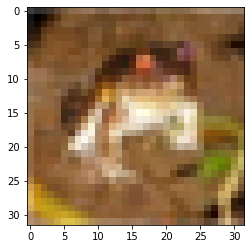

Classe: [9]


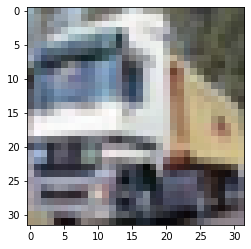

In [14]:
# Extrai conjunto de dados Cifar10 da coleção do Keras
(x_train, y_train), (x_val, y_val) = tf.keras.datasets.cifar10.load_data()

# Dimensão dos dados
print('Dados de treinamento:', x_train.shape, y_train.shape)
print('Dados de validação:', x_val.shape, y_val.shape)

# Transforma tensores Numpy em Dataset
data_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))

# Mostra alguns exemplos do Dataset
for image, label in data_ds.take(2):
    print("Classe: {}".format(label))
    plt.imshow(image)
    plt.show()

### 3.2 Estrutura dos objetos `Dataset`

Um `Dataset` contém componentes dispostos em uma estrutura, sendo que os componentes podem ser de tipos diferentes. O tipo de elemento de cada componente pode ser: ` Tensor`, `SparseTensor`,` RaggedTensor`, `TensorArray` ou mesmo um `Dataset`.

A propriedade `element_spec` permite inspecionar o tipo de cada elemento dos componentes de um `Dataset`. A propriedade retorna a estrutura dos elementos do `Dataset`.

Seguem alguns exemplos.

In [7]:
# Cria dataset com um tensor de dimensão 4x10
dataset1 = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10]))

# Verifica tipo dos elementos
dataset1.element_spec

TensorSpec(shape=(10,), dtype=tf.float32, name=None)

- Esse `Dataset`contém 4 linhas de dados, sendo cada linha um elemento de dimensão 1x10.

In [8]:
# Cria dataset com dois tensores
dataset2 = tf.data.Dataset.from_tensor_slices(
    (tf.random.uniform([4]),
    tf.random.uniform([4, 100], maxval=100, dtype=tf.int32)))

# Verifica tipo dos elementos
dataset2.element_spec

(TensorSpec(shape=(), dtype=tf.float32, name=None),
 TensorSpec(shape=(100,), dtype=tf.int32, name=None))

- Esse `Dataset` possui dois componentes. O primeiro possui elementos escalar e o segundo possui elementos com dimensão 1x100.

Pode-se criar um novo `Dataset` a partir de outros datasets usando o método `zip`.

In [9]:
# Cria um novo dataset com o dataset1 e dataset2
dataset3 = tf.data.Dataset.zip((dataset1, dataset2))

# Verifica tipo dos elementos
dataset3.element_spec

(TensorSpec(shape=(10,), dtype=tf.float32, name=None),
 (TensorSpec(shape=(), dtype=tf.float32, name=None),
  TensorSpec(shape=(100,), dtype=tf.int32, name=None)))

- O método `zip` une dois ou mais `Datasets`.

In [10]:
for elem in dataset3.take(2):
    print(elem[1][0],'\n')

tf.Tensor(0.7556642, shape=(), dtype=float32) 

tf.Tensor(0.19665337, shape=(), dtype=float32) 



### 3.2 Transformação de dados

Os dados de um `Dataset` podem ser transformados usando os métodos `map`, `apply` e `filter`. O método `map` aplica uma determinada função em cada elemento do `Dataset` e os métodos `apply` e `filter` aplicam uma função em todo o `Dataset`.

Para usar esses métodos tem-se que criar uma função para ser aplicada pelos mesmos.

O código abaixo apresenta um exemplo de uso do método `map` para transformar um `Dataset` com números inteiros em reais e depois calcular a raiz quadrada. O primeiro passo é criar um `Dataset`. 

In [11]:
# Cria dataset com números aleatórios inteiros
dataset = tf.data.Dataset.from_tensor_slices(tf.random.uniform([4, 10], minval=1, maxval=10, dtype=tf.int32))

# Apresenta dataset
for x in dataset:
    print(x.numpy())

[3 1 9 1 8 4 8 6 9 1]
[8 6 9 8 1 7 7 7 7 3]
[2 3 7 2 5 1 9 8 7 7]
[5 6 9 2 8 2 4 4 4 6]


In [12]:
## Define função para transformar números inteiros em reais e calcular a raiz quadrada
def raiz(x):
    y = tf.cast(x, tf.float32)**0.5 
    return y

# Aplica função raiz
dataset = dataset.map(raiz)

# Apresenta resultados
print(list(dataset.as_numpy_iterator()))

# Apresenta dataset
for x in dataset:
    print(x.numpy())

[array([1.7321, 1.    , 3.    , 1.    , 2.8284, 2.    , 2.8284, 2.4495,
       3.    , 1.    ], dtype=float32), array([2.8284, 2.4495, 3.    , 2.8284, 1.    , 2.6458, 2.6458, 2.6458,
       2.6458, 1.7321], dtype=float32), array([1.4142, 1.7321, 2.6458, 1.4142, 2.2361, 1.    , 3.    , 2.8284,
       2.6458, 2.6458], dtype=float32), array([2.2361, 2.4495, 3.    , 1.4142, 2.8284, 1.4142, 2.    , 2.    ,
       2.    , 2.4495], dtype=float32)]
[1.7321 1.     3.     1.     2.8284 2.     2.8284 2.4495 3.     1.    ]
[2.8284 2.4495 3.     2.8284 1.     2.6458 2.6458 2.6458 2.6458 1.7321]
[1.4142 1.7321 2.6458 1.4142 2.2361 1.     3.     2.8284 2.6458 2.6458]
[2.2361 2.4495 3.     1.4142 2.8284 1.4142 2.     2.     2.     2.4495]


- A função `cast()` do TensorFlow serve para alterar tipo de dado. No caso foi feita uma alteração de inteiro (`int32`) pata real (`float32`).

- O método `as_numpy_iterator()` do Numpy serve para iterar em um conjunto de tensores.

Mais detalhes de como usar os métodos `Dataset.apply()` e `Dataset.filter()` podem ser obtidos em https://www.tensorflow.org/api_docs/python/tf/data/Dataset

## 4. Carregar dados em um `Dataset` (Etapa de extração)

Dados podem ser de vários formatos e estarem em diversas formas. 

O módulo `tf.data` do TensorFlow fornece métodos para carregar praticamente qualquer tipo de dado. 

### 4.1 Tensores NumPy

Se o conjunto de dados for pequeno e couber na memória do computador, então, a forma mais simples para criar um `Dataset` é converter os dados em tensores e carregá-los com o método `from_tensor_slices()`.

Por exemplo, o conjunto de dados de dígitos MINIST pode ser importado da coleção de dados do Keras e transformado em um `Dataset` com o seguinte código.

In [16]:
# Importa dados MNIST do Keras
train, test = tf.keras.datasets.mnist.load_data()

# Separa imagens e rótulos
images_train, labels_train = train

# Normaliza pixels da imagem 
images_train = images_train/255.

# Cria dataset 
dataset = tf.data.Dataset.from_tensor_slices((images_train, labels_train))
dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.float64, tf.uint8)>

Para visualizar um exemplo do `Dataset` pode-se usar o código a seguir.

Dimensão das imagens =  (28, 28)
Classe = 4


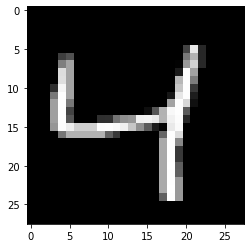

In [20]:
# Obtém um elemento do Dataset
it = iter(dataset)
image, label = next(it)

print('Dimensão das imagens = ', image.shape)
print('Classe =', label.numpy())
plt.imshow(image, cmap='gray')
plt.show()

### 4.2 Gerador de dados

Outra forma muito utilizada para carregar dados é usar um gerador de dados. 

Como já visto, um gerador de dados é usado quando o conjunto de dados é muito grande e não cabe na memória, assim, tem-se que carregar os dados lote a lote. 

Geradores de dados são muito usados para imagens e o seu uso permite também realizar "data augmentation".

No código abaixo é apresentado um gerador de dados que toda vez que é chamado retorna (`yield`) o próximo número de um sequencia de 1 a infinito.

In [21]:
# Define gerador de dados
def seq(stop):
    i = 0
    while i<stop:
        yield i
        i += 1
        
# Chama gerador de dados 5 vezes
for n in seq(5):
    print(n)

0
1
2
3
4


- Observe que um gerador de dados é diferente de uma função, pois ele retorna sempre o próximo elemento da sequência, ou seja, um gerador de dados "possui" memória.

O método `from_generator` converte um gerador de dados Python em um `Dataset`. Esse método recebe o gerador como entrada. 

No código abaixo é apresentado um exemplo de construção de um `Dataset` usando o gerador `seq` definido anteriormente.

In [22]:
ds_counter = tf.data.Dataset.from_generator(seq, args=[25], output_types=tf.int32, output_shapes = (), )

- Argumento `args` serve para passar valores para o gerador de dados. Nesse caso, esse argumento representa a variável `stop` do gerador `seq`.
 
- Argumento `output_types` é obrigatório e define o tipo de dado do `Dataset`.

- Argumento `output_shapes` é opcional e nesse caso é deixado como sendo indefinido para poder retornar sequências de comprimentos diferentes.

O uso de gerador para obter dados pode ser realizado com o método `repeat()` de acordo com o código abaixo.

In [24]:
for count_batch in ds_counter.repeat().batch(10).take(5):
    print(count_batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24  0  1  2  3  4]
[ 5  6  7  8  9 10 11 12 13 14]
[15 16 17 18 19 20 21 22 23 24]


- O método  `batch` define o número de elementos a ser gerado, ou o número de elementos por lote que será usado no treinamento.

- O método `take` define o número de lotes que se deseja obter.

Outro exemplo de um gerador mais completo, que retorna uma tuple de dados, que representa, por exemplo, dados de entrada e das saídas desajadas, é definido no código abaixo.

Nesse gerador o primeiro valor é um escalar e o segundo é um tensor de dimensão (1, 8)

In [27]:
# Define gerador de dados
def gen_series():
    i = 0
    while True:
        # Gera vetor de números aleatórios
        yield i, np.random.normal(size=(1,8))
        i += 1

# Chama o gerador 5 vezes        
for i, series in gen_series():
    print(i, ":", str(series))
    if i > 5:
        break       

0 : [[ 0.1942 -1.3291  1.4852 -0.2782 -0.4637  0.2184  0.8489 -2.541 ]]
1 : [[ 0.0209 -0.3744 -0.2917  2.2301  0.6559 -0.5297 -0.6705  0.3739]]
2 : [[-1.8184  0.6053  0.2946 -0.1622 -0.8219 -1.5316 -1.4855 -0.1868]]
3 : [[ 0.0996 -1.1036 -0.0097 -0.2335 -0.4082 -1.0848  0.0943 -1.1571]]
4 : [[ 1.3444  1.9321  0.6932  1.0667  0.2529 -0.3654  0.725  -0.2097]]
5 : [[ 0.7588 -0.4698 -0.3919 -0.2332 -0.1466  0.5387  1.01   -1.0156]]
6 : [[-1.2073 -0.1494 -1.5419 -0.0201  0.2946  0.8871  0.0075  0.4123]]


- O gerador possui um loop infinito que somente é quebrado quando não é mais chamado.

- A primeira saída é um número escalar inteiro (`int32`) e a segunda é um vetor de dimensão (1, 8) com números reais (`float32`) aleatórios com distribuição gaussiana.


Para criar um `Dataset` com esse gerador usa-se o método `from_generator` como anteriormente. 

Nesse caso é necessário definir os tipos de dados e as dimensões dos dados para as duas saídas do gerador.

In [29]:
# Cria Dataset com o gerador gen_series
ds_series = tf.data.Dataset.from_generator(
    gen_series, 
    output_types=(tf.int32, tf.float32), 
    output_shapes=((), (1,8,)))

# Apresenta carecterísticas gerais do dataset
ds_series.element_spec

(TensorSpec(shape=(), dtype=tf.int32, name=None),
 TensorSpec(shape=(1, 8), dtype=tf.float32, name=None))

Esse `Dataset` é usado da mesma forma que um `Dataset` regular. 

No código abaixo o `Dataset` `ds_series` é  inicializado para criar um lote com 10 exemplos (`batch(10)`) e os dados são embaralhados aleatóriamente usando o método `shuffle`.

In [31]:
# Inicializa dataset para gerar lote com 10 exemplos
ds_series_batch = ds_series.shuffle(20).batch(10)

# Iterage um única vez no dataset para obter um lote
ids, sequence_batch = next(iter(ds_series_batch))
print(ids.numpy())
print()
print(sequence_batch.numpy())

[ 8  9 17 18  5 11 13 19 25 10]

[[[-9.3381e-01 -6.6085e-01  1.0361e+00  5.9466e-01  1.6108e+00
    7.2091e-01  5.2858e-01 -4.7579e-01]]

 [[-1.3630e-01 -1.1596e+00  9.2602e-02 -3.1721e+00  3.5043e-01
   -6.0986e-01  2.7468e-01  1.0557e+00]]

 [[ 8.3798e-01 -3.4053e-01 -6.7402e-01 -2.1377e+00 -3.9926e-01
    1.7170e-01  3.1832e-01 -1.9662e+00]]

 [[ 1.2399e-01  4.0987e-02 -6.6945e-04 -1.2864e+00  5.0362e-01
    2.4113e-01 -7.2608e-02 -4.0769e-01]]

 [[-2.5102e-01 -9.1173e-01  4.5382e-01 -9.3285e-01  1.6502e-01
    7.1094e-01  1.9080e+00 -8.1194e-01]]

 [[-1.0385e+00 -5.4038e-01  2.4193e-01 -9.9474e-01 -1.5751e+00
   -8.0030e-01  5.0203e-02  1.4095e+00]]

 [[-4.2391e-01 -1.3038e+00 -2.8711e-01  2.9459e-01 -1.4727e+00
    5.3105e-02 -2.3478e+00 -2.1367e-01]]

 [[-6.1630e-01 -1.6754e+00  3.9840e-01  3.4566e-01 -8.4234e-01
   -5.3857e-01  1.1573e+00  1.0494e+00]]

 [[-4.7155e-01 -1.3367e+00  2.7148e+00 -8.3328e-01 -6.5898e-01
    4.2841e-01  1.4855e+00  1.0608e+00]]

 [[ 5.1129e-01 -9.7484

- No caso `shuffle(20)` representa que é formado um buffer de 20 exemplos de dados e o lote é sorteado aleatóriamente entre esses 20 exemplos. Observa-se que quanto maior o buffer, melhor é realizado o embaralhamento dos dados.

### 4.3 TFRecord

Quando o conjunto de dados for muito grande, uma opção para ler os dados de maneira eficiente é serializar os dados e armazená-los em um conjunto de arquivos binários com tamanho de, por exemplo, 100-200 MB cada, que podem ser lidos linearmente. 

O formato TFRecord é um formato simples para armazenar dados em uma sequência de registros binários. 

A classe `tf.data.TFRecordDataset` permite que os dados sejam carregados por meio de "streaming" a partir de um ou mais arquivos do tipo TFRecord e que sejam usados durante o treinamento de uma RNA em tempo real. 

Essa forma de armazenar dados é extremamente útil se os dados estiverem sendo transmitidos por uma rede.

Observa-se que existem muitos conjuntos de dados nesse formato.

Não veremos detalhes desse tipo de dado, assim, para obter mais informações sobre TFRecord ver [Loading TFRecords](https://www.tensorflow.org/tutorials/load_data/tfrecord).

Segue um exemplo simples de código que mostra como usar esse tipo de formato de dados. Nesse exemplo, são usados os dados de teste do conjunto de dados de nomes de ruas da França (FSNS).

In [33]:
# Define arquivos com os dados (são usados 2 arquivos do conjunto)
fsns_test_file = tf.keras.utils.get_file("fsns.tfrec", 
                 "https://storage.googleapis.com/download.tensorflow.org/data/fsns-20160927/testdata/fsns-00000-of-00001")

# Apresenta nome base do subdiretório onde estão os arquivos
print(fsns_test_file)

C:\Users\jklca\.keras\datasets\fsns.tfrec


- A função `tf.keras.utils.get_file()` carrega um ou mais arquivos da URL fornecida e coloca-os no diretório (ou arquivo)  "~./Keras/datsets/nome", onde "nome" é o nome do subdiretório (ou arquivo). 


- "fsns.tfrec" é o nome do subdiretório onde vão ser colocados os arquivos lidos e o outro argumento é a URL onde se encontram os arquivos de origem. Essa função também pode descompactar arquivos ao carregá-los. Existem muitos argumentos que podem ser definidos para essa função, para obter mais detalhes ver https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file.


- Observe que os arquivos já estão no formato TFRecords.

Para criar um `Dataset` com os dados contidos nesses arquivos, os nomes deles são passados pelo argumento `filenames` na inicialização do objeto `TFRecordDataset`. O argumento `filenames` pode ser uma string ou uma lista de strings.

O código a seguir apresenta como criar um `Dataset` usando os arquivos definidos na variável `fsns_test_file`.

In [34]:
dataset = tf.data.TFRecordDataset(filenames = [fsns_test_file])
dataset.element_spec

TensorSpec(shape=(), dtype=tf.string, name=None)

Para os dados poderem ser usados, os registros nos arquivos com os TFRecords precisam ser decodificados. O código a seguir realiza essa decodificação.

In [36]:
# Pega primeiro exemplo de dado
raw_example = next(iter(dataset))

# Decodifica dado
parsed = tf.train.Example.FromString(raw_example.numpy())

# Apresenta um exemplo de dado
parsed.features.feature['image/text']

bytes_list {
  value: "Rue Perreyon"
}

- O método `tf.train.Example.FromString()` realiza a transformação dos registros binários em string.


- Para mais detalhes sobre TFRecods ver https://www.tensorflow.org/tutorials/load_data/tfrecord.

### 4.4 Texto

Muitos conjuntos de dados de texto são distribuídos em vários arquivos. A classe `tf.data.TextLineDataset` fornece uma forma fácil de extrair linhas de texto de um ou mais arquivos. 

Dados os nomes dos arquivos em uma lista de strings, a classe `TextLineDataset` produz uma string para cada linha de texto desses arquivos.

Para mais detalhes ver https://www.tensorflow.org/tutorials/load_data/text.

In [37]:
# Define diretório onde estão os arquivos
directory_url = 'https://storage.googleapis.com/download.tensorflow.org/data/illiad/'

# Define nomes dos arquivos
file_names = ['cowper.txt', 'derby.txt', 'butler.txt']

# Cria os caminhos completos para todos os arquivos
file_paths = [tf.keras.utils.get_file(file_name, directory_url + file_name)
             for file_name in file_names]

# Aperesenta os caminhos
print(file_paths)

['C:\\Users\\jklca\\.keras\\datasets\\cowper.txt', 'C:\\Users\\jklca\\.keras\\datasets\\derby.txt', 'C:\\Users\\jklca\\.keras\\datasets\\butler.txt']


Cria `Dataset` com as linhas de texto dos arquivos e apresenta as 10 primeiras linhas dos primeiro arquivo.

In [40]:
# Cria dataset com linhas de texto
dataset = tf.data.TextLineDataset(file_paths)

# Apresenta 10 primeiras linhas
for line in dataset.take(10):
    print(line.numpy())

b"\xef\xbb\xbfAchilles sing, O Goddess! Peleus' son;"
b'His wrath pernicious, who ten thousand woes'
b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'
b'To dogs and to all ravening fowls a prey,'
b'When fierce dispute had separated once'
b'The noble Chief Achilles from the son'
b'Of Atreus, Agamemnon, King of men.'
b"Who them to strife impell'd? What power divine?"


A classe `TextLineDataset` retorna todas as linhas dos arquivos, o que pode não ser desejado, por exemplo, se a a primeira linha for um cabeçalho, ou conter comentários. 

Ao carregar um arquivo de texto, pode-se usar os métodos `skip()` ou `filter()`. Com esses métodos pode-se pular a primeira linha, ou quantas linhas for desejado e pegar as outras restantes.

Um exemplo de fazer essa operação segue abaixo com o conjunto de dados de texto criado anteriormente. Nesse exemplo pulam-se as 2 primeiras linhas.

In [39]:
# Cria novo dataset sem as duas primeiras linhas
linhas = dataset.skip(2)

# Apresenta 10 primeiras linhas do novo dataset
for line in linhas.take(10):
    print(line.numpy())

b"Caused to Achaia's host, sent many a soul"
b'Illustrious into Ades premature,'
b'And Heroes gave (so stood the will of Jove)'
b'To dogs and to all ravening fowls a prey,'
b'When fierce dispute had separated once'
b'The noble Chief Achilles from the son'
b'Of Atreus, Agamemnon, King of men.'
b"Who them to strife impell'd? What power divine?"
b"Latona's son and Jove's. For he, incensed"
b'Against the King, a foul contagion raised'


### 4.5 Arquivos tipo CSV

Arquivos no formato CSV podem ser carregados usando o Pandas e depois transformados em um objeto `Dataset`. Ou pode-se também carregá-los diretamente como um objeto `Dataset`.

#### Carregando arquivo com o Pandas

Se os dados couberem na memória, carregá-los com o Pandas é muito simples, como já vimos. 

Como exemplo vamos usar o conjunto de dados "Titanic".

In [42]:
# Define nome do arquivo e URL com o arquivo de dados
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Carrega dados com o Pandas
df = pd.read_csv(titanic_file, index_col=None)
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


Para transformar um `DataFrame` do Pandas em um objeto `Dataset` é usado o método `from_tensor_slices`, que  é o mesmo usado quando os dados estão no formato de tensores Numpy.

In [47]:
# Cria dataset com o dataframe Pandas
titanic_ds = tf.data.Dataset.from_tensor_slices(dict(df))

# Apresenta as 2 primeiras linhas dos dados
for feature_batch in titanic_ds.take(2):
    for key, value in feature_batch.items():
        print("  {}: {}".format(key, value))
    print(' ')

  survived: 0
  sex: b'male'
  age: 22.0
  n_siblings_spouses: 1
  parch: 0
  fare: 7.25
  class: b'Third'
  deck: b'unknown'
  embark_town: b'Southampton'
  alone: b'n'
 
  survived: 1
  sex: b'female'
  age: 38.0
  n_siblings_spouses: 1
  parch: 0
  fare: 71.2833
  class: b'First'
  deck: b'C'
  embark_town: b'Cherbourg'
  alone: b'n'
 


#### Carregando arquivo diretamente com `tf.data`

Uma forma mais eficiente é carregar os dados diretamente com o módulo `tf.data`, que permite carregar os dados na medida em forem necessários. Isso é importante para conjunto de dados muito grande que não cabe na memória do computador. 

O método `experimental.make_csv_dataset` é capaz de carregar partes de um arquivo tipo CSV. Esse método fornece suporte para selecionar e transformar colunas, gerar lotes de dados etc.

O código abaixo mostra um exemplo de como usar esse método para criar um `Dataset` a partir do arquivo de dados tipo CSV do conjunto de dados "Titanic".

In [48]:
# Define nome e URL com o arquivo de dados
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Cria objeto Dataset a partir do arquivo de dados 
titanic_batches_ds = tf.data.experimental.make_csv_dataset(
                  titanic_file, batch_size=4,
                  label_name="survived")

- Nesse exemplo foi escolhido um lote de 4 exemplos, ou seja, 4 linhas. Assim, somente 4 linhas são carregas e somente quando necessárias.


- A coluna com a saída desejada ("survived") já foi selecionada ao carregar os dados de forma a gerar automatiamente dados de entrada e de saída.

Como exemplo, o código abaixo apresenta um lote de 4 exemplos de dados do "titanic", carregado do Dataset criado.

In [49]:
# Gera um lote de dados do dataset
for feature_batch, label_batch in titanic_batches_ds.take(1):
    print("survived: {}".format(label_batch))
    print("features:")
    for key, value in feature_batch.items():
        print("  {}: {}".format(key, value))

survived: [0 0 0 0]
features:
  sex: [b'male' b'male' b'male' b'male']
  age: [24. 28. 28. 33.]
  n_siblings_spouses: [0 0 0 1]
  parch: [1 0 0 1]
  fare: [247.5208   8.4583  31.      20.525 ]
  class: [b'First' b'Third' b'First' b'Third']
  deck: [b'B' b'unknown' b'unknown' b'unknown']
  embark_town: [b'Cherbourg' b'Queenstown' b'Southampton' b'Southampton']
  alone: [b'n' b'y' b'y' b'n']


Ao carregar os dados, é possível selecionar somente as colunas desejadas, conforme mostra o código a seguir, onde somente 3 colunas são selecionadas ('class', 'fare', 'survived').

In [50]:
# Cria objeto dataset a partir do arquivo de dados
titanic_batches = tf.data.experimental.make_csv_dataset(
    titanic_file, batch_size=4,
    label_name="survived", select_columns=['class', 'fare', 'survived'])

# Gera um lote de dados do dataset
for feature_batch, label_batch in titanic_batches.take(1):
    print("survived: {}".format(label_batch))
    print("features:")
    for key, value in feature_batch.items():
        print("  {}: {}".format(key, value))

survived: [0 0 0 0]
features:
  fare: [29.125   7.8958  8.3     8.05  ]
  class: [b'Third' b'Third' b'Third' b'Third']


**Importante:** 

Para poder usar o Dataset acima com uma RNA, todos os dados tem que serem transformados para números. Para isso, o tensorFlow fornece o módulo `tf.feature_columns`, que permite transformar colunas de um conjunto de dados estruturados $\to$ isso será visto nas próximas aulas.

### 4.6 Conjuntos de arquivos

Existem muitos conjuntos de dados compostos por vários arquivos, onde cada arquivo é um exemplo ou alguns exemplos.

Nesse caso pode-se carregar todos os arquivos e colocá-los em um diretório temporário. 

In [52]:
# Define URL onde estão os arquivos e os carrega no diretório ~./keras/datasets/flower_photos
flowers_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

# Define caminho completo para colocar os arquivos
flowers_root = pathlib.Path(flowers_root)

print(flowers_root)

C:\Users\jklca\.keras\datasets\flower_photos


- Nesse exemplo a função `pathlib.Path(dir)` cria o caminho para todos os subdiretórios onde foram copiados os arquivos.

- O diretório onde são colocados os arquivos é um padrão do tf.keras.

O diretório "flower_photos" contém um subdiretório para cada tipo (classe) de flor.

Para obter os nomes dos subdiretórios usa-se o método `glob()` $\to$ o método `glob()` obtém os nomes dos subdiretórios e dos arquivos dentro de um diretório. 

Nesse exemplo, usa-se o argumento `"*"` no método `glob()` para selecionar tudo o que existe no diretório "flower_photos". 

In [53]:
# Lista nomes dos subdireórios 
for item in flowers_root.glob("*"):
    print(item.name)

daisy
dandelion
LICENSE.txt
roses
sunflowers
tulips


O código abaixo cria o `Dataset` de nome `list_ds`, que contém os caminhos e nomes de todos os arquivos de imagens do conjunto de dados. 

Após criar o `Dataset` são apresentados os primeiros 5 arquivos da lista.

In [54]:
# Obtém lista de arquivos no diretório "flowers_root"
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

# Apresenta os primeiros 5 arquivos da lista
for f in list_ds.take(5):
    print(f.numpy())

b'C:\\Users\\jklca\\.keras\\datasets\\flower_photos\\dandelion\\18282528206_7fb3166041.jpg'
b'C:\\Users\\jklca\\.keras\\datasets\\flower_photos\\daisy\\14569895116_32f0dcb0f9.jpg'
b'C:\\Users\\jklca\\.keras\\datasets\\flower_photos\\daisy\\19813618946_93818db7aa_m.jpg'
b'C:\\Users\\jklca\\.keras\\datasets\\flower_photos\\roses\\9355706808_a9a723a8e8_n.jpg'
b'C:\\Users\\jklca\\.keras\\datasets\\flower_photos\\dandelion\\506659320_6fac46551e.jpg'


- O método `list_files()` serve para criar um Dataset a partir de uma lista de arquivos de um diretório cujos nomes seguem um padrão fornecido como argumento para o método. Nesse exemplo, se usa como argumento `'*/*'`, o que representa selecionar todos os arquivos de todos os subdiretórios.  

Tendo o Dataset `lista_ds`, que contém a lista dos caminhos e nomes dos arquivos das imagens pode-se criar o Dataset com os dados.

No código abaixo é definida a função `process_path()`. Essa função realiza as seguintes tarefas:

- recebe um caminho indicando um arquivo de imagem e carrega esse arquivo;
- extrai a classe à qual pertence a flor, usando para isso a string com o caminho do arquivo. 

A função `process_path()` ao ser chamada com a lista de arquivos retorna o dataset com os pares `(image, label)`.

Para ler os arquivos usa-se a função `tf.io.read_file(nome)` do TensorFlow, onde `nome` é o caminho com o nome do arquivo a ser lido.

Para ler as classes usa-se a função `tf.strings.split(string, sep)`, que separa a string fornecida, usando como indicador para a separação o símbolo fornecido no argumento `sep`. No exemplo é selecionada a segunda string a partir do final após o símbolo "\\".

In [56]:
# Função process_path que le arquivo de imagem e obtém a sua classe
def process_path(file_path):
    label = tf.strings.split(file_path, sep='\\')[-2]
    return tf.io.read_file(file_path), label

# Cria dataset com as imagens e as suas classes
labeled_ds = list_ds.map(process_path)
labeled_ds

<MapDataset shapes: ((), ()), types: (tf.string, tf.string)>

Para verificar se tudo foi realizado de forma correta, o código a seguir obtém uma imagem do Dataset juntamente com a sua classe usando o método `take()`. 

A imagem é retornada como uma lista de strings (codificação "base64"). Se quisermos visualizar a imagem devemos decodificá-la usando o método `tf.io.decode_image()`, conforme mostrado abaixo.

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\xf0\x00\xf0\x00\x00\xff\xe2\x02@ICC_PROFILE\x00\x01\x01\x00\x00\x020ADBE\x02\x10\x00\x00mntrRGB XYZ \x07\xcf\x00\x06\x00\x03\x00\x00\x00\x00\x00\x00acspAPPL\x00\x00\x00\x00none\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

b'sunflowers'


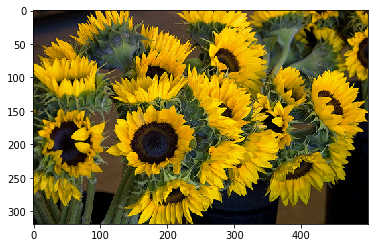

In [60]:
# Seleciona primeiro exemplo e par imagem-classe do dataset
for image_raw, label_text in labeled_ds.take(1):
    print(repr(image_raw.numpy()[:100]))
    print()
    print(label_text.numpy())

# Decodificação da imagem para poder ser visualizada
image = tf.io.decode_image(image_raw)

# Mostra imagem 
plt.imshow(image)
plt.show()

## 5. Criar lotes de exemplos para treinamento

Para dividir os exemplos em lotes para serem usados no treinamento da RNA, o módulo `tf.data` fornece meios de criar lotes de exemplos de um objeto `Dataset`.

### 5.1 Lotes simples

Para criar um lote de n exemplos de dados de um objeto `Dataset` usa-se o método `batch()`. Com esse método todos os exemplos devem ter a mesma dimensão.

O código abaixo apresenta um exemplo de definir lotes de um objeto `Dataset`. Nesse exemplo, primeiramente é criado um conjunto de dados com duas sequência de números e depois são defindos os lotes.

In [63]:
# Cria série de números crescentes de 0 a 100
inc_dataset = tf.data.Dataset.range(100)

# Cria série de números decrescentes de 0 a -100
dec_dataset = tf.data.Dataset.range(0, -100, -1)

# Cria dataset com as duas séries
dataset = tf.data.Dataset.zip((inc_dataset, dec_dataset))

# Cria novo dataset com lotes de 3 exemplos 
batched_dataset = dataset.batch(3)

# Mostra 5 lotes
for batch in batched_dataset.take(5):
    print([arr.numpy() for arr in batch])

[array([0, 1, 2], dtype=int64), array([ 0, -1, -2], dtype=int64)]
[array([3, 4, 5], dtype=int64), array([-3, -4, -5], dtype=int64)]
[array([6, 7, 8], dtype=int64), array([-6, -7, -8], dtype=int64)]
[array([ 9, 10, 11], dtype=int64), array([ -9, -10, -11], dtype=int64)]
[array([12, 13, 14], dtype=int64), array([-12, -13, -14], dtype=int64)]


- Observa-se que cada exemplo de treinamento é composto por dois números, sendo um da série crescente e outro da série descrescente.

Para vermos como o Dataset ficou após a divisão em lotes podemos fazer:

In [64]:
batched_dataset.element_spec

(TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

- Observe que o padrão do método `batch()` é retornar lotes de tamanho `None` (desconhecido), porque o último lote pode não estar completo. Como, ocorre no exemplo acima, pois com lotes de 3 elementos em um conjunto de 100 elementos resulta em 33 lotes de 3 elementos e um lote de 1 único elemento.

Se for desejado, isso pode ser corrigido usando o argumento `drop_remainder` para ignorar o último lote e, assim, obter todos os lotes de mesmo tamanho. Abaixo segue um exemplo.

In [66]:
# Cria novo dataset com lotes de 3 exemplos descartando o último lote
batched_dataset = dataset.batch(3, drop_remainder=True)
batched_dataset.element_spec

(TensorSpec(shape=(3,), dtype=tf.int64, name=None),
 TensorSpec(shape=(3,), dtype=tf.int64, name=None))

### 5.2 Criando lotes com "padding"

A forma de gerar lotes vista no item anterior funciona quando todos os exemplos tem a mesma dimensão. Contudo, em muitos problemas (como por exemplo, processamento de texto e processamento de séries temporais) é comum trabalhar com exemplos de comprimento diferentes. 

Para lidar com esses casos, completam-se os exemplos de menor comprimento com algum número de forma que todos os exemplos fiquem com o comprimento do maior exemplo. 

O método `padded_batch()` permite criar lotes de exemplos de dimensões diferentes especificando um ou mais eixos nos quais devem ser adiconados algum valor.

O código abaixo cria um `Dataset` com exemplos de comprimento variável usando o método `range`. Esse método cria uma sequencia de números da mesma forma que a função `range()` da biblioteca Numpy.

In [75]:
# Cria dataset com exemplos de comprimentos variáveis de 0 a 100
dataset = tf.data.Dataset.range(100)
dataset = dataset.map(lambda x: tf.fill([tf.cast(x, tf.int32)], x))

# Apresenta os 5 primeiros exemplos
for batch in dataset.take(5):
    print(batch.numpy())

[]
[1]
[2 2]
[3 3 3]
[4 4 4 4]


- A função `tf.fill(dim, valor)` usada acima, cria um tensor de dimensão `dim` com valores iguais a `valor`.

Se quisermos criar lotes de exemplos desse `Dataset` para ser udado por uma RNA, devemos completar os exemplos menores com algum valor para termos todos os exemplos do lote com o mesmo comprimento. Isso é feito com o método `padded_batch()`, conforme mostra o código abaixo.

In [76]:
# Cria datase com lotes que possuem exemplos de mesma dimensão
v = tf.constant(0, dtype=tf.int64)
dataset = dataset.padded_batch(4, padded_shapes=(None,), padding_values=v)

# Apresenta 4 primeiros exemplos
for batch in dataset.take(3):
    print(batch.numpy())

[[0 0 0]
 [1 0 0]
 [2 2 0]
 [3 3 3]]
[[4 4 4 4 0 0 0]
 [5 5 5 5 5 0 0]
 [6 6 6 6 6 6 0]
 [7 7 7 7 7 7 7]]
[[ 8  8  8  8  8  8  8  8  0  0  0]
 [ 9  9  9  9  9  9  9  9  9  0  0]
 [10 10 10 10 10 10 10 10 10 10  0]
 [11 11 11 11 11 11 11 11 11 11 11]]


- O primeiro argumento definido o tamanho dos lotes, que no caso é 4.
- O valor padrão para preencher os exemplos menores é zero. Portanto, nesse exemplos não precisaria ser definido.
- Se `padded_shapes` for uma constante, todos os exemplos serão preenchidos até o comprimento definido.
- Se `padded_shapes` for `None`, os exemplos terão a dimensão do maior exemplo.

### 5.3 Gerando lotes para várias épocas

O módulo `tf.data` oferece duas maneiras principais de utilizar lotes de dados.

A maneira mais simples de iterar em um conjunto de dados em várias épocas é usar o método `repeat`. 

Para exemplificar, vamos usar o conjunto de dados Titanic lendo as suas linhas e não carregando-o como um arquivo CSV.

In [77]:
# Define nome e URL do arquivo de dados
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Cria Dataset a partir do arquivo de dados
titanic_lines = tf.data.TextLineDataset(titanic_file)

A função `plot_batch_sizes()`, definida abaixo, mostra um gráfico do número de elementos dos lotes gerados de um Dataset. 

In [78]:
def plot_batch_sizes(ds):
    batch_sizes = [batch.shape[0] for batch in ds]
    plt.bar(range(len(batch_sizes)), batch_sizes)
    plt.xlabel('Batch number')
    plt.ylabel('Batch size')

Aplicar o método `repeat` antes de definir o tamanho do lote repete os dados indefinidamente. Assim, um comando `batch` aplicado após o comando `repeat` irá produzir lotes que ultrapassam os limites da época, como no exemplo a seguir.

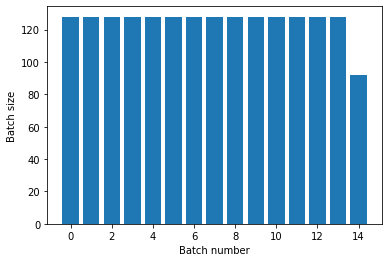

In [80]:
# Gera lotes
titanic_batches = titanic_lines.repeat(3).batch(128)

# Mostra tamanho dos lotes gerados
plot_batch_sizes(titanic_batches)

Esse conjunto de dados Titanic possui 630 exemplos (linhas de dados). Assim, com lotes de 128 exemplos cada, tem-se no máximo 4,9 lotes possíveis com dados diferentes e no caso foram gerados 14 lotes.

Se for necessário uma separação de época clara, deve-se colocar o método `batch` antes do método `repeat`, como mostrado a seguir.

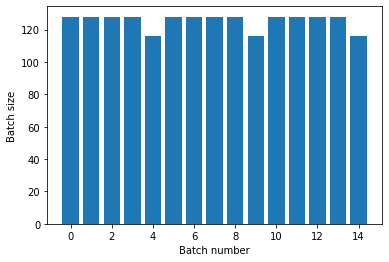

In [81]:
# Gera lote de dados
titanic_batches = titanic_lines.batch(128).repeat(3)

# Mostra tamanho dos lotes gerados
plot_batch_sizes(titanic_batches)

Nesse caso, observa-se que são gerados 4,9 lotes sem repetição dos dados 3 vezes.

### 5.4 Embaralhamento aleatório dos dados

O método `shuffle(n)` mantém "n" exemplos em um "buffer" e seleciona os exemplos de forma aleatória entre os elementos desse "buffer". 

Observa-se que quanto maior o tamanho do "buffer" melhor a seleção aleatória, mas pode ocupar muita memória e um grande tempo para ser preenchido.

O código abaixo carrega os dados na forma de linhas de texto do conjunto de dados "Titanic". 

Para facilitar a visualização de como funciona esse método, é adicionado um índice aos exemplos do `Dataset`.. 

In [83]:
# Carrega arquivo de dados 
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Cria dataset com as linhas na forma de texto
lines_ds = tf.data.TextLineDataset(titanic_file)

# Cria dataset com índices 
indice_ds = tf.data.experimental.Counter()

# Cria dataset com índices e as linhas de texto
dataset = tf.data.Dataset.zip((indice_ds, lines_ds))

# Embaralha dados e cria lote de 10 exemplos 
dataset = dataset.shuffle(buffer_size=100)
dataset = dataset.batch(10)
dataset.element_spec

(TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 TensorSpec(shape=(None,), dtype=tf.string, name=None))

Na medida em que `buffer_size` é de 100 linhas, e o tamanho do lote é 10, o primeiro lote contém elementos de índices no máximo até 110.

O código abaixo mostra os exemplos (linhas do Datset) selecionados no lote.

In [85]:
# Instancia o Dataset com um gerador e executa o mesmo 
n, line_batch = next(iter(dataset))

# Mostra resultados
print('Índices das linhas do conjunto de dados selecionadas no lote:', n.numpy())
print('\nLinhas:\n', line_batch)

Índices das linhas do conjunto de dados selecionadas no lote: [12 47 96  4 55 43 80 25 88 89]

Linhas:
 tf.Tensor(
[b'0,female,14.0,0,0,7.8542,Third,unknown,Southampton,y'
 b'0,male,11.0,5,2,46.9,Third,unknown,Southampton,n'
 b'0,male,32.5,1,0,30.0708,Second,unknown,Cherbourg,n'
 b'1,female,35.0,1,0,53.1,First,C,Southampton,n'
 b'0,male,26.0,2,0,8.6625,Third,unknown,Southampton,n'
 b'0,male,65.0,0,1,61.9792,First,B,Cherbourg,n'
 b'0,male,28.0,0,0,7.8958,Third,unknown,Southampton,y'
 b'1,female,28.0,1,0,146.5208,First,B,Cherbourg,n'
 b'0,female,14.5,1,0,14.4542,Third,unknown,Cherbourg,n'
 b'0,male,22.0,0,0,8.05,Third,unknown,Southampton,y'], shape=(10,), dtype=string)


## 6. Transformação dos dados

Existem diversos métodos para transformar (processar) os dados de um objeto `Dataset`. Os métodos a serem utilizados dependem do tipo de dados. 

Para dados estruturados, do tipo encontrado em arquivos tipo CSV, já vimos como utilizar o Pandas e também existe o módulo `tf.feature_column` do TensorFlow.

O método `map(f)` pode ser usado para qualquer tipo de dado. Esse método transforma os dados de um Dataset aplicando a função `f` em cada elemento do Dataset.

A função `f`,  aplica pelo método `map(f)`, deve receber um tensor que representa um único elemento do Dataset e retorna outro tensor que representa também um único elemento. Essa função deve usar operações do TensorFlow para realizar as transformações desejadas.

### 6.1 Decodificação e redimensionamento de imagens

Quando se usa imagens reais para treinar uma RNA, geralmente é necessário redimensionar as imagens e normalizar os seus pixels.

Como exemplo de transformação de imagens vamos usar o conjunto de dados "flowers" usando o método `map`. 

O código abaixo constrói esse conjunto de dados usando a lista dos arquivos no Dataset `list_ds`, como já visto.

In [86]:
list_ds = tf.data.Dataset.list_files(str(flowers_root/'*/*'))

- Observe que o caminho `flowres_root` já foi definido no item 4.6.

Para transformar os dados, a primeira etapa é criar uma função que manipula os elementos do Dataset. 

Para exemplificar, é criada a função `transform_image`, que recebe o caminho com o nome do arquivo da imagem e realiza as seguintes operações:

- Cria as classes das flores a partir do nome dos subdiretórios onde estão os arquivo com as imagens;
- Carrega o arquivo da imagem em memória;
- Decodifica os dados recriando a imagem original;
- Converte a imagem para números do tipo float32;
- Redimension a imagem;
- Retorna a imagem e a classe.

In [87]:
# Define função transform_image
def transform_image(filename):
    # Cria a classe dos dados
    label = tf.strings.split(filename, '\\')[-2]
    
    # Carrega dados do arquivo em formato base 64 
    image = tf.io.read_file(filename)
    
    # Decodifica imagem para formato jpg
    image = tf.image.decode_jpeg(image)
    
    # Converte imagem para tipo float32
    image = tf.image.convert_image_dtype(image, tf.float32)
    
    # Redimensiona imagem
    image = tf.image.resize(image, [128, 128])
    
    # Normaliza os pixles
    image = image/255.
    
    return image, label

A função `transform_imagem` é testada na célula abaixo.

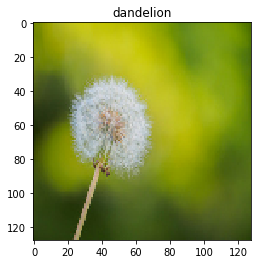

In [89]:
# Define caminho e nome da imagem pegando primeiro elemento do Dataset list_ds
file_path = next(iter(list_ds))

# Processa imagem com a função transform_imagem
image, label = transform_image(file_path)

# Define função para mostrar imagem
def show(image, label):
    plt.figure()
    plt.imshow(image*255)
    plt.title(label.numpy().decode('utf-8'))

# Mostra imagem usando a função show
show(image, label)

Usando a função `transform_image`, aplicada com o método `map()`, cria-se um novo Dataset com as imagens transformadas prontas para serem usadas pela RNA. Essa operação é realizada no código abaixo. 

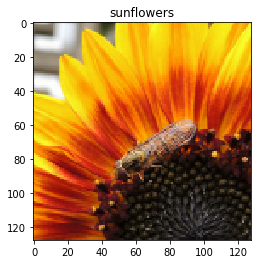

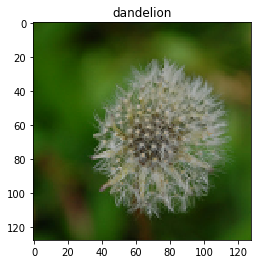

In [90]:
# Transforma imagens com função parse_images
images_ds = list_ds.map(transform_image)

# Apresenta os dois primeiros exemplos
for imagei, labeli in images_ds.take(2):
    show(imagei, labeli)

### 6.2 Aplicação de funções arbritárias

Por motivos de desempenho, é melhor usar as operações do TensorFlow para pré-processar os dados sempre que possível. No entanto, às vezes é necessário usar bibliotecas Python externas para transformar os dados. 

A função `tf.py_function()` aplica uma função qualquer para transformar os dados de um Dataset usando o método `map`.

Por exemplo, se for desejado aplicar uma rotação aleatória em uma imagem usando a função `scipy.ndimage.rotate` da biblioteca ScikitLearn no conjunto de dados "flowers", tem-se:

In [91]:
# Importa classe de funções para transformar imagens
import scipy.ndimage as ndimage

# Define função para rotacionar imagem  
def random_rotate_image(image):
    image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
    return image

Teste da função `random_rotate_image()`. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


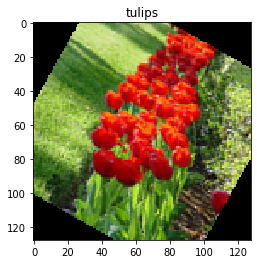

In [92]:
# carrega uma exemplos do Dataset
image, label = next(iter(images_ds))

# Testa função para rotacionar imagem
image = random_rotate_image(image)
show(image, label)

A função `random_rotate_image()` não pode ser usada diretamente para transformar lotes durante o treinamento de uma RNA. 

Para usar a função `tf.py_function` com o método `Dataset.map`, é necessário definir a dimensão e o tipo de dado. Mas para isso deve-se criar uma nova função que chama a função `random_rotate_image(image)`, da seguinte forma:

In [93]:
# Define função que chama função para rotacionar imagem 
def tf_random_rotate_image(image, label):
    im_shape = image.shape
    [image,] = tf.py_function(random_rotate_image, [image], [tf.float32])
    image.set_shape(im_shape)
    return image, label

Para aplicar essa transformação nos exemplos do Dataset faz-se:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


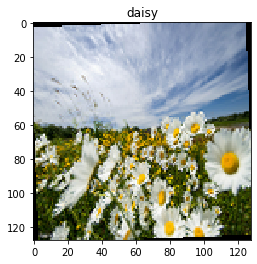

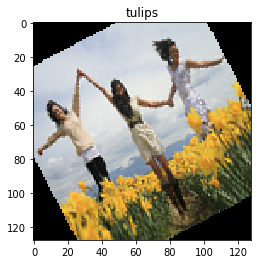

In [94]:
# Cria Dataset com a transformação de rotação desejada
rot_ds = images_ds.map(tf_random_rotate_image)

# Mostra 2 exemplos do novo Dataset
for image, label in rot_ds.take(2):
    show(image, label)

### 6.3 Janelamento de séries temporais

Dados de séries temporais devem manter a sequência no tempo inalterada, assim, eles não devem ser embaralhados antes de gerar os lotes de exemplos de treinamento.

Um exemplo de treinamento de uma série temporal para ser usado por uma rede neural, consiste de algumas amostras da sequência adquiridas em um determinado intervalo de tempo. 

Observa-se que uma série temporal pode ser analisada com uma rede neural com camadas recorrentes ou com uma rede neural com camadas convolucionais de 1D.

Vamos usar uma série temporal simples como exemplo de criar um `Dataset`.

In [95]:
# Cria uma série temporal simples
serie_ds = tf.data.Dataset.range(100000)

#### Janelas de dados com uso do método `batch`

A abordagem mais simples para criar exemplos de treinamento de uma série temporal é agrupar os dados em lotes para isso, usa-se o método `batch` escolhendo o número de amostras da série em cada exemplo de treinamento. 

In [97]:
# Cria Datset com lotes de 10 elementos
batches_ds = serie_ds.batch(10, drop_remainder=True)

# Mostra 5 primerios lotes 
for batch in batches_ds.take(5):
    print(batch.numpy())

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]


Ressalta-se que essa forma de organizar dados de séries temporais não é muito útil porque em geral deseja-se treinar uma RNA para fazer previsões. Assim, os dados de treinamento devem possuir entradas e saídas. 

#### Janela de dados para realizar previsão de alguns passos no futuro

Em geral deseja-se realizar previsões da série para alguns instantes de tempo no futuro, assim, a saída desejada deve conter amostras da série alguns instantes de tempo no futuro em relação às amostras contidas na entrada correspondente.

Para treinar uma RNA para realizar previsões $k$ instantes de tempo no futuro, baseado em uma série temporal, um exemplo de treinamento deve ser composto por:

- **Entrada**: conjunto de amostras da série no intervalo de tempo de $(n-m)T$ até $nT$, onde $m$ é o comprimento da janela no passado, $T$ é o intervalo de tempo entre cada amostra e $nT$ é o tempo "presente".
- **Saída desejada**: elementos da série nos instantes de tempo $(n+1)T$ até $(n+k)T$, onde $k$ é o números de instantes no futuro para os quais deseja-se realizar previsões. 

Na célula abaixo é apresentado como criar esse tipo de exemplo de treinamento. Define-se uma função que recebe como entrada lotes do Dataset `series_ds`, criados definindo o tamanho da janela desejada, $m$, e quantos passos no futuro deseja-se prever.

In [99]:
# Define comprimento da janela e quantas previsões deseja-se fazer no futuro
feature_length = 8 # m da fórmula acima
label_length = 2 # k da fórmula acima

# Cria Dataset com lotes de tamanho "m" (entradas)
features_ds = serie_ds.batch(feature_length, drop_remainder=True)

# Cria Dataset com o número de saídas futuras desejadas ("k")
labels_ds = serie_ds.batch(feature_length).skip(1).map(lambda labels: labels[:-(feature_length-label_length)])

# Cria Daset final unindo os dois Dataset criados com as entradas e as saídas desejadas
predict_k_steps_ds = tf.data.Dataset.zip((features_ds, labels_ds))

# Mostra 3 exemplos de treinamento
for features, label in predict_k_steps_ds.take(3):
    print(features.numpy(), " => ", label.numpy())

[0 1 2 3 4 5 6 7]  =>  [8 9]
[ 8  9 10 11 12 13 14 15]  =>  [16 17]
[16 17 18 19 20 21 22 23]  =>  [24 25]


- O método `skip` aqui define o número de `feature_lengths` em que a janela é deslocada para cada exemplo.

#### Janela de dados com uso do método `window`

A forma anterior usando o método `batch` funciona, mas o método `window` é feito especialmente para gerar janelas de dados. 

O método `window` permite um controle melhor de como criar as janelas de dados. Porém, tem que se tomar cuidado porque ele retorna um `Datset` de `Datasets`.

In [100]:
# Define tamanho da janela de dados
window_size = 5

# Define passo de deslocamento da janela 
d = 1

# Cria objeto para gerar as janelas 
windows_ds = serie_ds.window(window_size, shift=d)
for sub_ds in windows_ds.take(6):
    print(sub_ds)

<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>
<_VariantDataset shapes: (), types: tf.int64>


Observe que foram criados 6 Datasets de dados e não é isso que queremos. 

O método `flat_map` pode ser usado para transformar um Dataset de Datasets em um único Dataset. Porém ao fazer isso todos os elementos do Dataset são unidos em um único elemento. 

Para separar cada exemplo de treinamento pode-se usar o método `batch` nesse novo conjunto de dados. Essas operações podem ser realizadas de acordo com o código da célula a seguir.

In [101]:
# Define função para separar os exemplos de treinamento gerados
def sub_to_batch(sub):
    return sub.batch(window_size, drop_remainder=True)

# Une todos os elementos do Datset e gera exemplos de treinamento com o método window e a função sub_to_batch
for example in windows_ds.flat_map(sub_to_batch).take(10):
    print(example.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]
[ 6  7  8  9 10]
[ 7  8  9 10 11]
[ 8  9 10 11 12]
[ 9 10 11 12 13]


Além do argumento `shift`, o método `window` possui o argumento `stride`. Para entender o que fazem esses argumentos vamos criar exemplos de treinamento com alguns valores de `shift` e `stride`.

A função `make_window_dataset` agrupa todas as operações para criar lotes de janelas de uma série temporal.

In [103]:
# Função para criar lotes de janelas de uma série temporal
def make_window_dataset(ds, window_size=5, shift=1, stride=1):
    windows = ds.window(window_size, shift=shift, stride=stride)

    def sub_to_batch(sub):
        return sub.batch(window_size, drop_remainder=True)

    windows = windows.flat_map(sub_to_batch)
    return windows

In [108]:
# Instancia objeto Dataset com função make_window_dataset
ds = make_window_dataset(serie_ds, window_size=5, shift=1, stride=1)

# Gera exemplos de treinamento
for example in ds.take(10):
    print(example.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]
[ 6  7  8  9 10]
[ 7  8  9 10 11]
[ 8  9 10 11 12]
[ 9 10 11 12 13]


Para finalizar, falta criar as saídas dos exemplos de treinamento. Para isso podemos criar uma função que separa as saídas das entradas dos exemplos de treinamento criados com a função `make_window_dataset`. 

In [109]:
# Define tamanho da janela (m) e numero de previsões no futuro (k)
feature_length = 5 # m da fórmula acima
label_length = 1 # k da fórmula acima

# Deve-se inicialmente criar janelas com a quantidade de amostras iguais ao m+k
total_length = feature_length + label_length

# Cria exemplos de treinamento que contém as entradas e as saídas
ds = make_window_dataset(serie_ds, window_size=total_length, shift=1, stride=1)

# Define função para separar entradas das saídas
def labels(ds):
    saida = ds[-label_length:] 
    entrada = ds[:feature_length]
    return entrada, saida

# Executa função para separar entradas das saídas
dense_labels_ds = ds.map(labels)

# Mostra 3 exemplos de treinamento
for inputs, labels in dense_labels_ds.take(3):
    print(inputs.numpy(), "=>", labels.numpy())

[0 1 2 3 4] => [5]
[1 2 3 4 5] => [6]
[2 3 4 5 6] => [7]


### 6.5 Conjunto de dados com classes desbalanceadas

Vimos em uma aula da disciplina "Ferramentas de Desenvolvimento 1" um método para treinar uma RNA com um conjunto de dados desbalanceado usando pesos para as classes. 

Existem outras formar de lidar com esse tipo de dados sem a necessidade de usar pesos para as classes. Essas formas são baseadas em criar lotes de dados com as classes balanceadas $\to$ o módulo `tf.data` fornece métodos para fazer isso.

Para exemplicar essas formas vamos utilizar o conjunto de dados "The credit card fraud". Esse conjunto de dados pode ser carregado diretamente do TensorFlow. Uma descrição desses dados pode ser vista em https://www.kaggle.com/mlg-ulb/creditcardfraud.

Vamos inicialmente carregar esse conjunto de dados em um DataFrame Pandas para poder visualizá-lo e entender melhor os dados.

In [110]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [112]:
print('Dimensão do cojunto de dados:', df.shape)

Dimensão do cojunto de dados: (284807, 31)


Esse conjunto de dados possui 284.807 exemplos, sendo que cada exemplo possui 30 características e uma saída que representa as duas classes: dados sem fraude (classe = 0) e dados com fraude (classe = 1).

Vamos calcular as estatísticas básicas de cada coluna (característica) do conjunto de dados.

In [113]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Carregar conjunto de dados para permitir criar lotes com classes balanceadas

Vamos carregar esse conjunto de dados de forma a carregar os dados lote por lote.

Na célula abaixo é definido o local onde se encontra os dados e depois os dados são carregados e descompactados. 

In [114]:
# Define local do conjunto de dados
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/download.tensorflow.org/data/creditcard.zip',
    fname='creditcard.zip',
    extract=True)

# Carrega conjunto de dados e descompacta arquivo
csv_path = zip_path.replace('.zip', '.csv')

#### Criar objeto Dataset a partir do conjunto de dados

Esse Dataset é criado e no mesmo comando são realizadas as seguintes definições:

- Definição do tamanho dos lotes;
- Indicada a coluna onde se encontram as saídas desejadas;
- Transforma os tipos de dados em reais (entradas) e inteiro (saída).

In [119]:
creditcard_ds = tf.data.experimental.make_csv_dataset(
    csv_path, batch_size=1024, label_name="Class",
    shuffle = False, # Embaralhamento de dados não funciona com esse tipo de processo
    column_defaults=[float()]*30+[int()]) # Define os tipos de dados das colunas (30 reais e 1 inteira)

Para verificar o conteúdo de um lote de dados, tem-se:

In [120]:
# Verifica tipo dos elementos
creditcard_ds.element_spec

(OrderedDict([('Time', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V1', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V2', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V3', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V4', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V5', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V6', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V7', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V8', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V9', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V10', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V11', TensorSpec(shape=(1024,), dtype=tf.float32, name=None)),
              ('V12', TensorSpec(shape=(1024,), dtype=tf.flo

In [121]:
print('Estrutura de um lote de dados:\n', creditcard_ds)
print('\nExemplo de um lote:')
for lote in creditcard_ds.take(1):
    print(format(lote))

Estrutura de um lote de dados:
 <PrefetchDataset shapes: (OrderedDict([(Time, (1024,)), (V1, (1024,)), (V2, (1024,)), (V3, (1024,)), (V4, (1024,)), (V5, (1024,)), (V6, (1024,)), (V7, (1024,)), (V8, (1024,)), (V9, (1024,)), (V10, (1024,)), (V11, (1024,)), (V12, (1024,)), (V13, (1024,)), (V14, (1024,)), (V15, (1024,)), (V16, (1024,)), (V17, (1024,)), (V18, (1024,)), (V19, (1024,)), (V20, (1024,)), (V21, (1024,)), (V22, (1024,)), (V23, (1024,)), (V24, (1024,)), (V25, (1024,)), (V26, (1024,)), (V27, (1024,)), (V28, (1024,)), (Amount, (1024,))]), (1024,)), types: (OrderedDict([(Time, tf.float32), (V1, tf.float32), (V2, tf.float32), (V3, tf.float32), (V4, tf.float32), (V5, tf.float32), (V6, tf.float32), (V7, tf.float32), (V8, tf.float32), (V9, tf.float32), (V10, tf.float32), (V11, tf.float32), (V12, tf.float32), (V13, tf.float32), (V14, tf.float32), (V15, tf.float32), (V16, tf.float32), (V17, tf.float32), (V18, tf.float32), (V19, tf.float32), (V20, tf.float32), (V21, tf.float32), (V22, tf.fl

#### Cálculo do número de exemplos de cada classe

A função `count()` definida abaixo conta o número de exemplos de cada classe.

In [122]:
def count(counts, batch):
    features, labels = batch
    class_1 = labels == 1
    class_1 = tf.cast(class_1, tf.int32)

    class_0 = labels == 0
    class_0 = tf.cast(class_0, tf.int32)

    counts['class_0'] += tf.reduce_sum(class_0)
    counts['class_1'] += tf.reduce_sum(class_1)

    return counts

Executa função `count()` para calcular o número de exemplos de cada classe. Para isso é utilizado o método `reduce` que aplica a função `count()` no Dataset.

In [123]:
counts = creditcard_ds.take(10).reduce(initial_state={'class_0': 0, 'class_1': 0}, reduce_func = count)

counts = np.array([counts['class_0'].numpy(), counts['class_1'].numpy()]).astype(np.float32)

fractions = counts/counts.sum()
print('Fração de dados sem fraude:', fractions[0])
print('Fração de dados com fraude:', fractions[1])

Fração de dados sem fraude: 0.9961914
Fração de dados com fraude: 0.0038085938


- O método `reduce` chama a função `count()` sucessivamente para cada elemento do conjunto de dados de entrada até que o conjunto de dados se esgote, agregando informações em seu estado interno. O argumento `initial_state` é usado para definir o estado inicial da variável desejada e o estado final é retornado como resultado


- Observe como as duas classes de dados são altamente desbalanceadas.

#### Balanceamento das classes nos lotes de exemplos de treinamento

O módulo `tf.data` fornece duas abordagens para criar lotes com exemplos das classes balanceadas:

- Re-amostragem do Dataset
- Rejeição de amostras

#### Abordagem #1: Amostragem do Dataset

Nessa forma, cada lote de dados criado é amostrado do Dataset usando o método `sample_from_datasets`. 

Essa forma somente pode ser utilzada quando se tem dois Datasets separados, sendo um para cada classe. Assim, deve-se primeiramente criar os dois Datastes a partir do Dataset original. Para isso usa-se o método `filter`, da seguinte forma:

In [124]:
# Cria Dataset com os dados sem fraude (negativo, classe = 0)
negativos_ds = creditcard_ds.unbatch().filter(lambda features, label: label==0).repeat()

# Cria Dataset com os dados com fraude (positivo, classe = 1)
positivos_ds = creditcard_ds.unbatch().filter(lambda features, label: label==1).repeat()

- O método `unbatch` une todos os elementos de um Dataset em um único elemento.

- O método `filter` aplica uma função especificada no Dataset. Essa função deve representar uma condição e os elementos que satisfazem essa condição são slecionados.

Vamos verificar o resultado dessas operações visualizando as classes dos exemplos em cada um desses dois Datasets criados.

In [125]:
# Mostra um lote com 10 exemplos sem fraude
for features, label in negativos_ds.batch(10).take(1):
    print('Classes dos exemplos do Dataset sem fraude:', label.numpy())
    
# Mostra um lote com 10 exemplos com fraude
for features, label in positivos_ds.batch(10).take(1):
    print('Classes dos exemplos do Dataset com fraude:', label.numpy())

Classes dos exemplos do Dataset sem fraude: [0 0 0 0 0 0 0 0 0 0]
Classes dos exemplos do Dataset com fraude: [1 1 1 1 1 1 1 1 1 1]


Para criar lotes com exemplos das duas classes usa-se o método `sample_from_datasets`, passando a fração do número de exemplos desejados de cada clase, da seguinte forma:

In [126]:
# Dataset que cria lotes de elementos com as classes desbalanceadas
balanced_ds = tf.data.experimental.sample_from_datasets(
              [negativos_ds, positivos_ds], [0.5, 0.5]).shuffle(100).batch(10)

- Cada lote contém 10 elementos.
- Nesse caso foi escolhido ter metade dos exemplos do lote de cada classe.

Para verificar o resultado, vamos mostrar as classes de 8 lotes com exemplos cada.  

In [127]:
# Mostra 8 primeiros lotes do Dataset balanced
for features, labels in balanced_ds.take(8):
    print(labels.numpy())

[1 0 1 0 1 1 1 0 0 1]
[1 1 1 1 0 0 0 1 1 1]
[0 1 1 0 1 0 0 1 0 1]
[0 0 0 1 0 0 1 1 1 0]
[1 0 0 1 1 0 0 1 1 0]
[1 0 0 0 1 1 0 0 1 0]
[1 0 0 0 1 0 1 0 0 1]
[0 0 1 1 0 1 0 1 0 0]


#### Abordagem #2: Rejeição de amostras

Um problema com a abordagem anterior, usando os métodos `experimental.sample_from_datasets` e `filter`, é que precisa de um Dataset separado para cada classe, resultando na necessidade de replicar os dados e, assim, ocupa mais memória.

O método `experimental.rejection_resample` pode ser aplicado em um Dataset para balancear as classes ao mesmo tempo em que carrega os lotes de dados durante o treinamento. Nessa abordagem elementos são eliminados do lote até obter o número de classes balanceado.

Nessa abordagem, o método `experimental.rejection_resample` recebe a função `class_func` como argumento. Essa função `class_func` é aplicada em cada elemento do lote para determinar de qual classe aquele elemento pertence para poder realizar o balanceamento.

Observa-se que essa abordagem somente funciona se os lotes forem os mesmos em cada época. Assim, nessa abordagem não se pode usar o método `shuffle` para embaralhar os exemplos.

O Dataset `creditcard` já está preparado para retornar lotes com pares de entradas e saídas `(features, label)`, assim, a função `class_func` deve ser definida para retornar somente as saídas. Essa função é bem simples e está definida na célula a seguir.

In [128]:
# Função que retorna classe dos exemplos de treinamento
def class_func(features, label):
    return label

O amostrador de elementos do lote é um objeto da classe `rejection_resample`. Esse objeto precisa de um objetivo para a distribuição de cada classe nos lotes e a forma como essa distribuição é descrita. 

Um exemplo de como instanciar um objeto `rejection_resample` é definida na célula abaixo.

In [129]:
# Instancia objeto rejection_resample para balancear lote
resampler = tf.data.experimental.rejection_resample(
            class_func, target_dist=[0.5, 0.5], initial_dist=fractions)

- No caso tem-se cada classe com 50% dos elementos em cada lote.

O objeto `resampler` analisa cada exemplo de treinamento individualmente, assim, para poder ser utilizado é necessário `unbatch` o Dataset antes de aplicá-lo. Na célula a seguir é criado o Dataset para gerar os lotes com o `resampler`.

In [130]:
# Cria Dataset que gera lotes com classes balanceadas usando a abordagem de re-amostragem
resample_ds = creditcard_ds.unbatch().apply(resampler).shuffle(100).batch(10)

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:



O `resampler` criado, retorna um par classe-exemplo (`class, example`), porém a função `class_func` já retorna as saídas (`labels`). Nesse caso cada exemplo de treinamento já possui a sua saída associada, assim, esse processo resulta em que cada elemento do lote tenha uma entrada e duas saídas. Portanto, deve-se eliminar uma das saídas e para isso pode-se usar o método `map` como mostrado a seguir.

In [131]:
# Elimina a saída repetida em cada exemplo de treinamento
balanced_ds = resample_ds.map(lambda extra_label, features_and_label: features_and_label)

# Mostar exemplos de lotes gerados pelo Dataset 
for features, labels in balanced_ds.take(8):
    print(labels.numpy())

[1 1 0 0 1 1 0 0 1 0]
[1 0 0 1 1 1 0 1 1 1]
[1 0 0 0 1 0 1 1 1 0]
[1 1 1 0 1 0 1 0 0 0]
[1 1 1 0 0 1 1 1 0 0]
[0 1 0 0 0 1 0 0 0 1]
[1 0 1 0 0 1 1 0 0 1]
[0 1 0 0 0 1 0 0 1 0]


## 7. Divisão de Datasets em dados de treinamento, validação e teste

Existem algumas formas de dividir um Dataset em Datasets de treinamento, validação e teste. Vamos ver duas dessas formas.

Outra forma de dividir os dados em vários conjuntos é realizar essa divisão antes de criar o Dataset usando, por exemplo, a função `train_test_split` da biblioteca ScikitLearn.

### 7.2 Forma simples

Uma forma bem simples de realizar uma divisão de dados de um Dataset é simplesmente usar o método `take` para pegar um número de exemplos (lotes) determinados de um Dataset.

Observa-se que esse método é determinístico, ou seja, sempre divide os dados da mesma forma e sempre seleciona os exemplos na mesma sequência em que estão no Dataset original.

Para exemplificar o uso dessa forma de dividir um Dataset, vamos usar o exemplo do Dataset `titanic` e dividí-lo nos conjuntos de treinamemto, validação e teste.

In [132]:
# Define nome do arquivo e URL com o arquivo de dados
titanic_file = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Carrega dados com o Pandas
df = pd.read_csv(titanic_file, index_col=None)

# Cria dataset com o dataframe Pandas com lote de 1 exemplo
titanic_ds = tf.data.Dataset.from_tensor_slices(dict(df)).batch(1)

In [133]:
# Determina número de lotes nos Datasets de validação e teste
num_elements = 100

# Divide Dataset em 3
val_ds = titanic_ds.take(num_elements)
test_ds = titanic_ds.take(num_elements)
train_ds = titanic_ds.skip(2*num_elements)

In [134]:
# Itera nos Datasets para calcular número de lotes
test_ds_length = [i for i,_ in enumerate(test_ds)][-1] + 1
val_ds_length = [i for i,_ in enumerate(val_ds)][-1] + 1
train_ds_length = [i for i,_ in enumerate(train_ds)][-1] + 1

print('Número de lotes de treinamento:', train_ds_length)
print('Número de lotes de validação:', val_ds_length)
print('Número de lotes de teste:', test_ds_length)

Número de lotes de treinamento: 427
Número de lotes de validação: 100
Número de lotes de teste: 100


- Observe que no caso os lotes são de um único exemplo, então, o número de lotes é igual ao número de exemplos dos Datasets.


- Note que nesse caso temos que conhecer o número de lotes (ou exemplos) do Dataset se quisermos ter uma fração definida para os três conjuntos de dados.

### 7.2 Forma geral

Vamos ver uma forma mais geral de dividir um Dataset em conjuntos de treinamento e teste, que funciona para qualquer tipo de Dataset. 

A primeira etapa é criar duas funções que selecionam os exemplos para serem do conjunto de treinamento ou do conjunto de teste. 

Nesse exemplo, vamos agora dividir os dados nos conjuntos de treinamento e teste, sendo 80% dos dados para treinamento e 20% para teste.

Na célula abaixo são criados duas funções:

- Função `is_test()`, que seleciona 1 em cada 5 exemplos como sendo de teste;
- Função `is_train()`, que seleciona 4 em cada 5 exemplos com sendo de treinamento.

Essas funções selecionam os exemplos tendo como base um índice, que é incluído pelo método enumerate.

A função `recover` elimina o índice incluído pelo método `enumerate` e, assim, recuperr os exemplos originais.

Após criar essas funções o Dataset é dividido usando os métodos: `enumerate`, `filter` e a função `recover()`.

- O método `enumerate` introduz indices numéricos nos exemplos para permitir que sejam selecionados pelas funções `is_test()` e `is_train()`;
- O método `filter`, chama as funções `is_test()` e `is_trains`, que selecionam os exemplos com base nos seus índices;
- O método `map` chama a função  `recover` para eliminar o índice incluído pelo método `enumerate`.

Obviamente que se for desejado divir os dados em três conjuntos (treinamento, validação e teste), temos que definir 3 funções para selecionar os exemplos, ou seja, temos que definir outra função, `is_val(),` do mesmo tipo que as funções `is_train()` e `is_test()`. Além disso, temos que fazer algumas alterações nessas funções.

Na célula a seguir são defindas as funções `is_test()`, `is_train()` e `recover()`. 

In [135]:
# Define função que seleciona exemplos de teste
def is_test(x, y):
    return x % 4 == 0

# Define função que seleciiona exemplos de treinamento
def is_train(x, y):
    return not is_test(x, y)

# Define função que elimina índice usado para selecionar exemplos incluidos com o método enumerate
recover = lambda x,y: y

Para exemplificar o uso dessa forma de dividir um Dataset, vamos usar novamente o Dataset `titanic` e dividí-lo nos conjuntos de treinamemto e teste.

In [136]:
# Cria Dataset de teste
test_ds = titanic_ds.enumerate().filter(is_test).map(recover)

# Cria Dataset de treinamento
train_ds = titanic_ds.enumerate().filter(is_train).map(recover)

Para verificar o conteúdo de um lote de dados, pode-se fazer:

In [137]:
# verifica o conteúdo de um lote do Dataset
test_ds.element_spec

{'survived': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'sex': TensorSpec(shape=(None,), dtype=tf.string, name=None),
 'age': TensorSpec(shape=(None,), dtype=tf.float64, name=None),
 'n_siblings_spouses': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'parch': TensorSpec(shape=(None,), dtype=tf.int64, name=None),
 'fare': TensorSpec(shape=(None,), dtype=tf.float64, name=None),
 'class': TensorSpec(shape=(None,), dtype=tf.string, name=None),
 'deck': TensorSpec(shape=(None,), dtype=tf.string, name=None),
 'embark_town': TensorSpec(shape=(None,), dtype=tf.string, name=None),
 'alone': TensorSpec(shape=(None,), dtype=tf.string, name=None)}

Para verificar número de lotes do Dataset.

In [138]:
# Itera nos Datasets para calcular número de lotes
test_ds_length = [i for i,_ in enumerate(test_ds)][-1] + 1
train_ds_length = [i for i,_ in enumerate(train_ds)][-1] + 1

print('Número de lotes de treinamento:', train_ds_length)
print('Número de lotes de teste:', test_ds_length)

Número de lotes de treinamento: 470
Número de lotes de teste: 157


- Observe novamente que no caso os lotes são de um único exemplo, então, o número de lotes é igual ao número de exemplos dos Datasets.